### To Build decision tree model to predict survival based on certain parameters

In the file using following columns build a model to predict if person would survive or not,
1. Pclass
2. Sex
3. Age
4. Fare

In [86]:
import pandas as pd
import seaborn as sns

In [87]:
df = pd.read_csv('titanic.csv')

<AxesSubplot:>

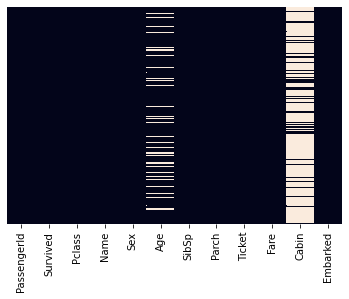

In [88]:
df.head(2)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

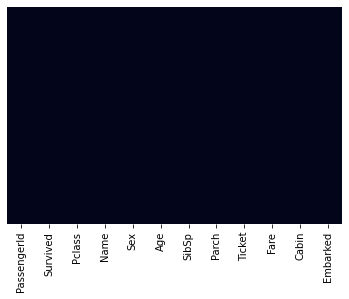

In [89]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)



In [90]:
inputs = df[['Pclass','Sex','Age','Fare']]

In [91]:
inputs.head()

,Pclass,Sex,Age,Fare
1,1,female,38.0,71.2833
3,1,female,35.0,53.1000
6,1,male,54.0,51.8625
10,3,female,4.0,16.7000
11,1,female,58.0,26.5500


In [92]:
target = df['Survived']

In [93]:
target.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [94]:
# To convert categorical features of SEX column into no.

In [95]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
inputs['Sex_n'] = le_sex.fit_transform(inputs['Sex'])

<ipython-input-95-f471bd75e1fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex_n'] = le_sex.fit_transform(inputs['Sex'])


In [96]:
inputs.head()

,Pclass,Sex,Age,Fare,Sex_n
1,1,female,38.0,71.2833,0
3,1,female,35.0,53.1000,0
6,1,male,54.0,51.8625,1
10,3,female,4.0,16.7000,0
11,1,female,58.0,26.5500,0


In [97]:
inputs_n = inputs.drop(['Sex'],axis='columns')

In [98]:
inputs_n.head()

,Pclass,Age,Fare,Sex_n
1,1,38.0,71.2833,0
3,1,35.0,53.1000,0
6,1,54.0,51.8625,1
10,3,4.0,16.7000,0
11,1,58.0,26.5500,0


In [99]:
target.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(inputs_n,target,test_size=0.2)

In [102]:
#Now both the dataframes are ready to use so lets import decision tree

In [103]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [104]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
model.score(x_test,y_test)

0.7837837837837838

In [106]:
y_predict=model.predict(x_test)

In [107]:
model.predict([[1,54.0,51.8625,1]])

array([0], dtype=int64)

In [108]:
model.predict([[3,4,16.7,0]])

array([1], dtype=int64)

Confusion Matrix to check the accuracy

In [109]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_predict)
conf_mat

array([[ 8,  5],
       [ 3, 21]], dtype=int64)

Text(69.0, 0.5, 'True')

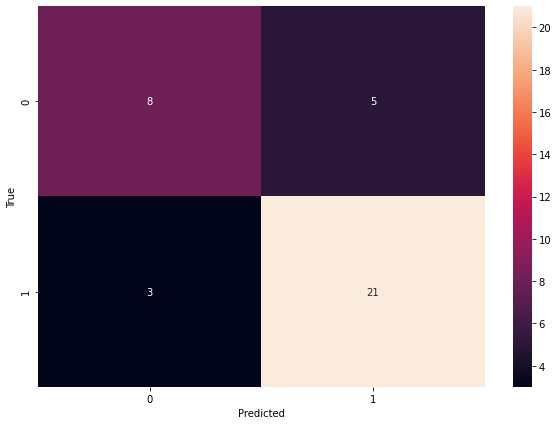

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')